<a href="https://colab.research.google.com/github/ramasulistyo/Machine-Learning-and-Deep-Learning-SC/blob/main/04_03_Fire_Muhammad_Rama_Diennova_Sulistyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset MNIST

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 65735467.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 52078974.13it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29208089.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4677271.98it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



##Visualisasi Data MNIST

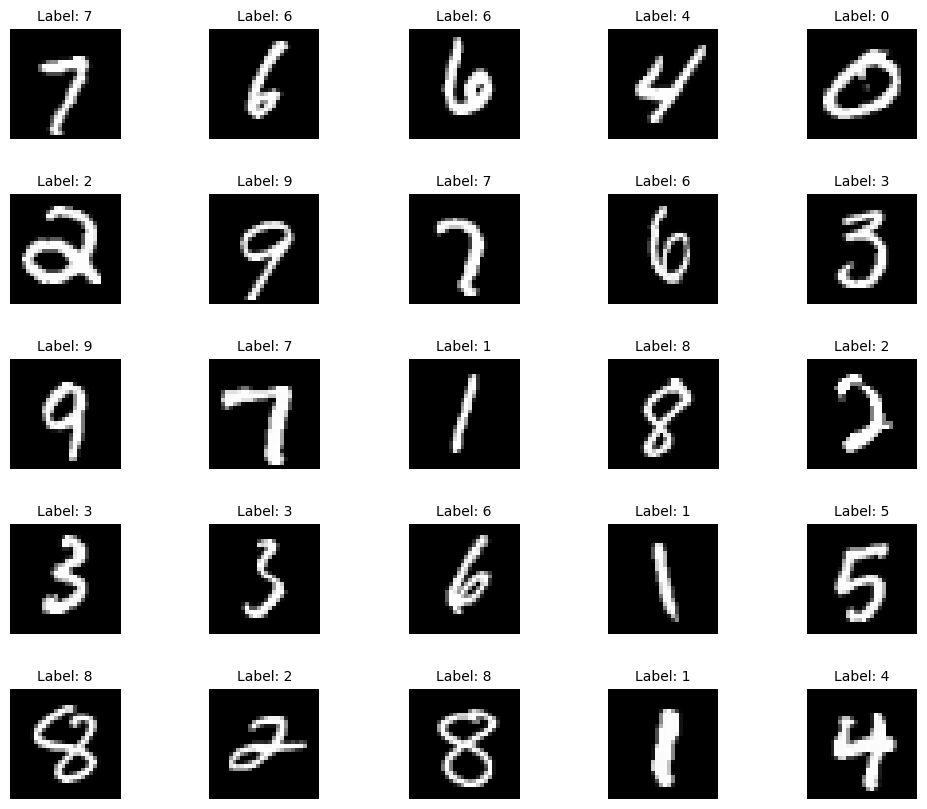

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
images, labels = next(dataiter)

fig, axes = plt.subplots(5, 5, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}', fontsize=10)
    ax.axis('off')  # Menghilangkan sumbu
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Jarak antar subplot
plt.show()

## Desain Model Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()


##Pengaturan Hyperparameter


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch = 10

##Looping untuk training model

In [ ]:
for epoch in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

Epoch 1, Loss: 0.05640924418879264
Epoch 2, Loss: 0.05049545093497106
Epoch 3, Loss: 0.04569667923415124
Epoch 4, Loss: 0.04324440610645188
Epoch 5, Loss: 0.03960031649277884
Epoch 6, Loss: 0.03787277971263672
Epoch 7, Loss: 0.03509335406737386
Epoch 8, Loss: 0.03313587914794346
Epoch 9, Loss: 0.027995084779622377
Epoch 10, Loss: 0.030725814254133097


##Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print('Akurasi: {:.2f}%'.format(accuracy * 100))
print("")

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix: ")
print(cm)
print("")

classification_rep = classification_report(all_labels, all_preds)
print('Laporan Klasifikasi:')
print(classification_rep)

Akurasi: 96.80%

Confusion Matrix: 
[[ 945    2    7    0    4    0    7    9    1    5]
 [   0 1131    1    0    0    1    2    0    0    0]
 [   1    3 1002    6    3    0    3   11    2    1]
 [   0    1    4  995    0    1    0    6    3    0]
 [   0    4    4    0  963    0    3    4    0    4]
 [   2    2    0   21    2  852    6    4    2    1]
 [   2    3    1    1    4    6  940    0    1    0]
 [   0    8    8    1    2    0    0 1007    1    1]
 [   0   11    5   23    3    6    3    5  916    2]
 [   0   20    1    7   29    2    2   16    3  929]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.9

##Penjelasan Akhir

Hasil di atas mencerminkan pencapaian dari pelatihan model deep learning untuk mengklasifikasikan digit tulisan tangan dalam dataset MNIST. Selama proses pelatihan, model melewati beberapa iterasi (epoch) dengan mengalami penurunan berkelanjutan dalam nilai kerugian (loss), menunjukkan perkembangan yang signifikan dalam pembelajaran model. Pada akhirnya, model mencapai tingkat akurasi sekitar 96.80%.

Selain itu, dengan melihat (confusion matrix) dan laporan klasifikasi, kita dapat mendapatkan wawasan yang mendalam tentang performa model dalam mengklasifikasikan setiap kelas digit. Ini mencakup evaluasi berbagai metrik seperti presisi (precision), recall, dan nilai F1. Model ini menunjukkan kinerja yang luar biasa dalam pengenalan digit tulisan tangan, dengan akurasi yang tinggi dan konsistensi yang kuat di seluruh kelas digit. Hasil ini membenarkan bahwa model ini sangat efektif dalam tugas klasifikasi digit.